In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
import pandas as pd

path = "/Users/hemas/Downloads/diabetes.csv"

data_diabetes = pd.read_csv(path)

data_diabetes_info = data_diabetes.info()
display(data_diabetes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

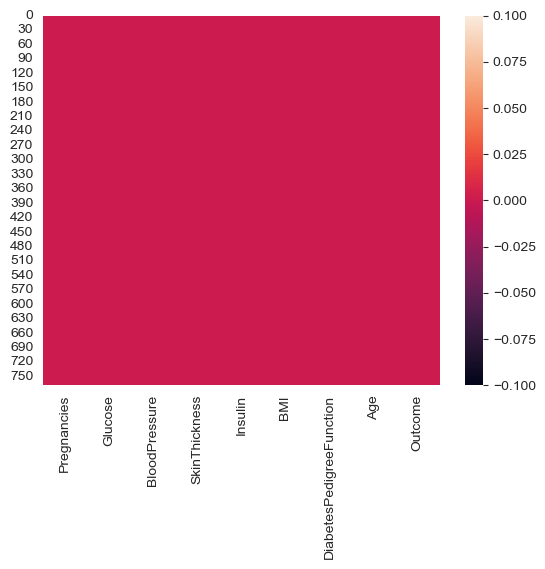

In [41]:
sns.heatmap(data_diabetes.isnull())

In [44]:
correlation =data_diabetes.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.017683  0.235035       0.234336       0.481701   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.017683                 -0.033523   
Glucose                   0.419451  0.235

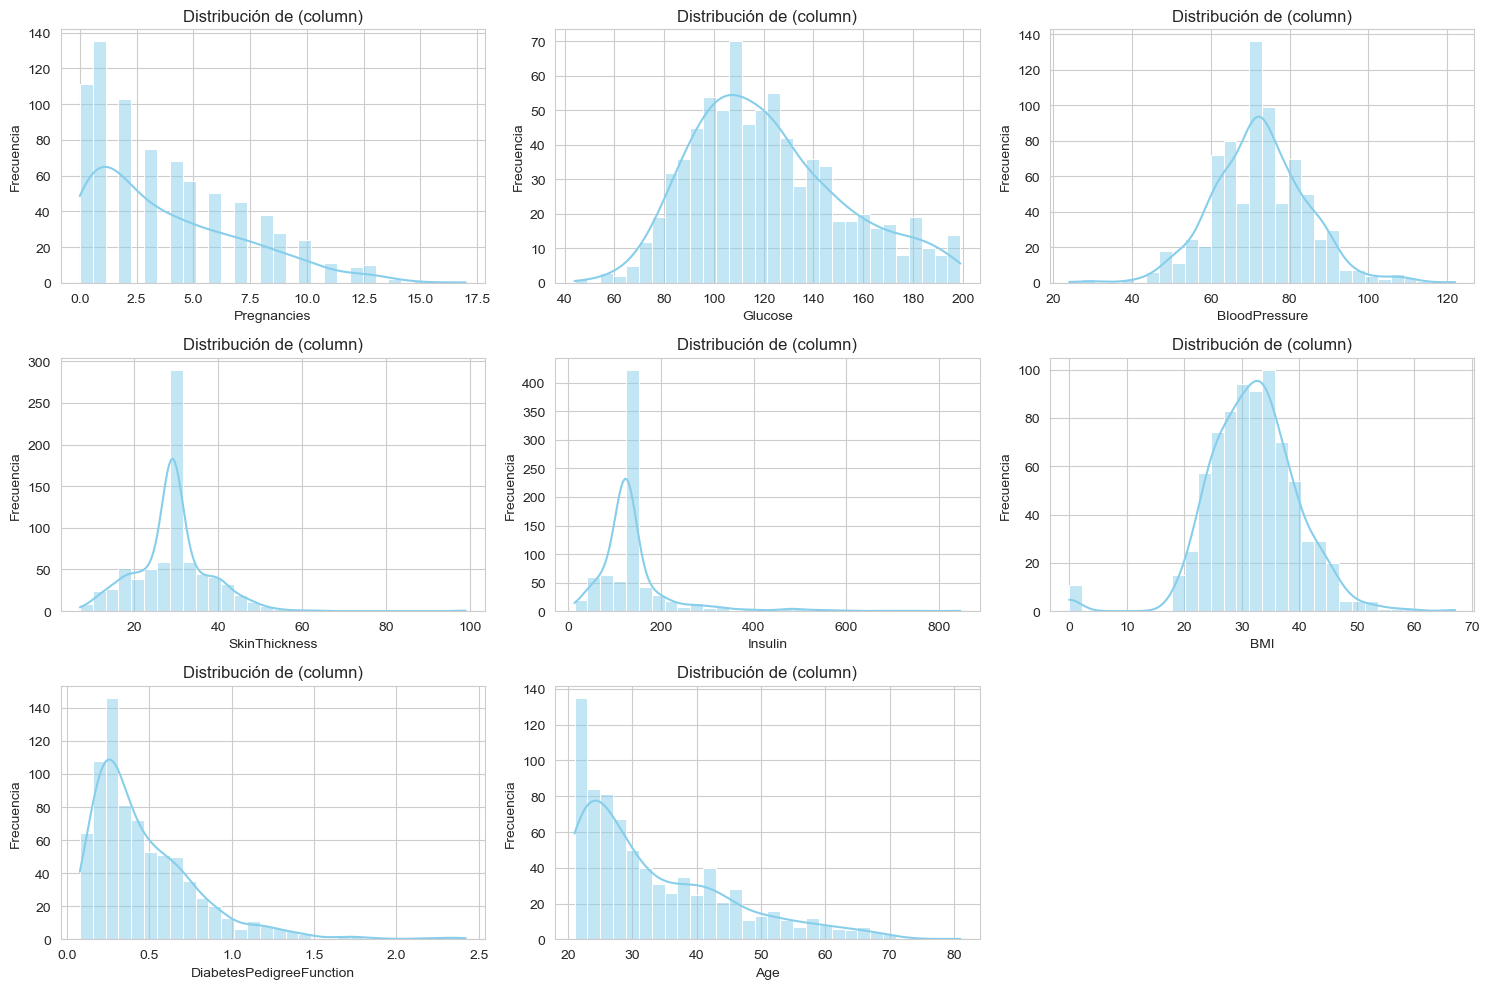

In [46]:
#Configuration for visualizations
sns.set_style("whitegrid")

#Visualization of the distributions of the variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_diabetes.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_diabetes[column], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribución de (column)')
    plt.xlabel(column) 
    plt.ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()

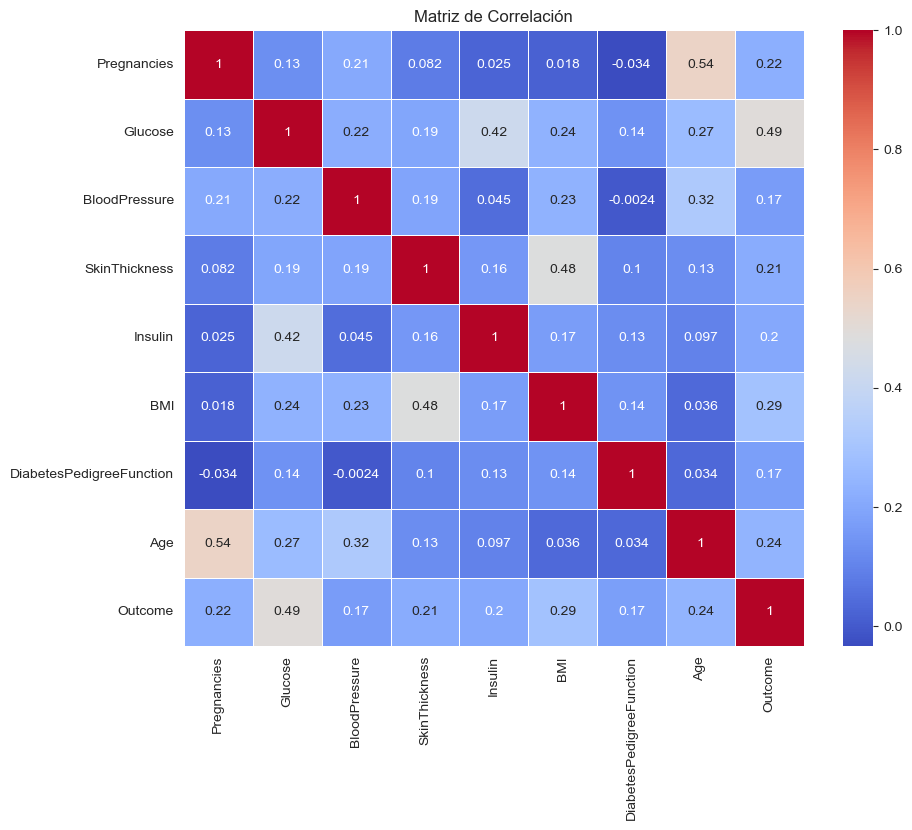

In [47]:
#visualization of the correlation between variables
plt.figure(figsize=(10, 8))
correlation_matrix = data_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

In [23]:
#Defining columns that have values of 0 that must be treated
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

#Replacing 0 values with NaN
for column in columns_with_zeros:
    data_diabetes[column] = data_diabetes[column].replace(0, np.nan)
    
#Replacing the NON with the median of each column
for column in columns_with_zeros:
    data_diabetes[column].fillna(data_diabetes[column].median(), inplace=True)

#Checking if NON values still exist in the data set
nan_values = data_diabetes.isnull().sum()

nan_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
#Definition of the characteristics and the target variable
x = data_diabetes.drop("Outcome", axis=1)
y = data_diabetes["Outcome"]

#Splitting the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardization of features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled.shape, x_test_scaled.shape

((614, 8), (154, 8))

In [35]:
# Creating and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(x_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.7532467532467533,
 array([[82, 17],
        [21, 34]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

In [37]:
# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)

# Predictions on the test set
y_rf_pred = rf_model.predict(x_test_scaled)

# Model evaluation
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_class_report = classification_report(y_test, y_rf_pred)

rf_accuracy, rf_conf_matrix, rf_class_report


(0.7337662337662337,
 array([[78, 21],
        [20, 35]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

In [39]:
# Preprocess the data
# Set values to 0 for the 'Glucose', 'BloodPressure', 'Skin Thickness, and Insulin' columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in columns_with_zeros:
    data_diabetes[column].replace(0, data_diabetes[column].median(), inplace=True)
    
# Split the data set into features (X) and labels (y)
x = data_diabetes.drop("Outcome", axis=1)
y = data_diabetes["Outcome"]

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)

# Evaluate the model
y_pred = dt_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

# Importance of Features
feature_importance = dt_model.feature_importances_
for feature, importance in zip(x.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Accuracy: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Feature: Pregnancies, Importance: 0.06075661464468774
Feature: Glucose, Importance: 0.3356187205012328
Feature: BloodPressure, Importance: 0.08631253370211535
Feature: SkinThickness, Importance: 0.05500248709903033
Feature: Insulin, Importance: 0.078591582701987
Feature: BMI, Importance: 0.15055221284220968
Feature: DiabetesPedigreeFunction, Importance: 0.10966647017062481
Feature: Age, Importance: 0.12349937833811234


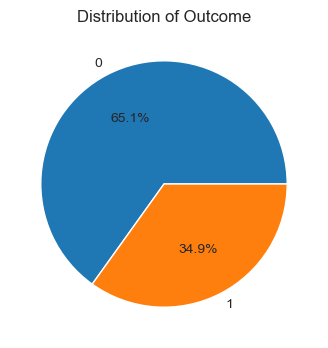

In [49]:
plt.figure(figsize=(6, 4))
data_diabetes["Outcome"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Outcome")
plt.ylabel("")
plt.show()